
# Section 5: analysing celebrity faces
## Video 1: Explore possible solutions: downloading the data, visualising it, and trying our previous networks

![overview image](http://mmlab.ie.cuhk.edu.hk/projects/celeba/overview.png)
Download the data here: http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html
![download](illustrations/downloadceleba.png)



Paper here: https://arxiv.org/abs/1411.7766

In [1]:
## Load the data

## Using the load data pipeline of Tensorflow


## Section 2: Reducing our trainable parameters by adding pooling layers
As you can see in the thing above we have a lot of parameters. What we see is that our convolutional layers get activated, and that these activations tell a lot about what we can see in the image. 
For classification tasks it's a good idea to reduce the amount of parameters. 

To do this we can go over our feature map, take several activations, and group these together. This is called a "pooling layer", you take a pool of parameters and apply a simple function on it. 

https://en.wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer

Famous pooling layers are max-pooling and average pooling. 
`pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)`

![max pool](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/Max_pooling.png/314px-Max_pooling.png)



https://www.tensorflow.org/tutorials/layers

In [2]:
# import tensorflow as tf
# files = tf.train.match_filenames_once("datasets/CelebA/Anno/*.txt")
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     print(sess.run(files))


In [3]:
# # load dataset
# import tensorflow as tf
# tf.reset_default_graph()
# filename_queue = tf.train.string_input_producer(["datasets/CelebA/Anno/list_attr_celeba.txt"])
# print(filename_queue)
# reader = tf.TextLineReader(skip_header_lines=2)
# key, value = reader.read(filename_queue)
# print(key)
# print(value)
# indices, values, shape = tf.string_split([value], delimiter=' ')


# sess = tf.Session()
# init = tf.global_variables_initializer() # https://www.tensorflow.org/api_docs/python/tf/global_variables_initializer
# sess.run(init)

# coord = tf.train.Coordinator()
# threads = tf.train.start_queue_runners(sess=sess, coord=coord)

# for _ in range(10):
#     a = sess.run([key, value])
#     print(a)
# #    print(sess.run(split_val))


In [4]:
# print(split_val)

This leads to nothing: 
> Sparse input data

SparseTensors don't play well with queues. If you use SparseTensors you have to decode the string records using tf.parse_example after batching (instead of using tf.parse_single_example before batching).

From this page: https://www.tensorflow.org/api_guides/python/reading_data


Great tutorial: https://ischlag.github.io/2016/06/19/tensorflow-input-pipeline-example/

In [5]:
filenames = []
labels = []
folder_base = 'datasets/CelebA/Img/img_align_celeba/'
with open("datasets/CelebA/Anno/list_attr_celeba.txt") as in_file:
    count_datapoints = int(in_file.readline())
    plaintext_labels = in_file.readline().split()
    for line in in_file:
        splitted = line.split()
        filenames.append(folder_base+splitted[0])
        properties_celebrity = [float(x) for x in splitted[1:]]
        properties_celebrity = [max(0.0, x) for x in properties_celebrity]
        labels.append(properties_celebrity)
assert len(filenames) == len(labels)

print(labels[:4])
print(filenames[:4])




[[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0]]
['datasets/CelebA/Img/img_align_celeba/000001.jpg', 'datasets/CelebA/Img/img_align_celeba/000002.jpg', 'datasets/CelebA/Img/img_align_celeba/000003.jpg', 'datasets/CelebA/Img/img_align_celeba

In [6]:
import numpy as np
a = np.array(labels)
print(a.shape)
print(np.mean(a,axis=0))
print(len(np.mean(a,axis=0)))
print(plaintext_labels)
AWESOME_WEIGHTS = 1/np.mean(a,axis=0)

(202599, 40)
[ 0.11113579  0.26698059  0.512505    0.20457159  0.02244335  0.15157528
  0.24079586  0.23453225  0.23925093  0.14799185  0.05089857  0.20519351
  0.14216753  0.05756692  0.04668829  0.06511878  0.06276438  0.04194986
  0.38692195  0.45503186  0.41675428  0.48342786  0.04154512  0.11514864
  0.83493996  0.28414257  0.0429469   0.27744461  0.07977828  0.06572096
  0.05651064  0.48208037  0.20840182  0.31956722  0.18892492  0.04846026
  0.4724357   0.12296704  0.07271507  0.77361685]
40
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earri

In [7]:
from tensorflow.python.framework import ops
from tensorflow.python.framework import dtypes
# convert string into tensors
all_images = ops.convert_to_tensor(filenames, dtype=dtypes.string)
all_labels = ops.convert_to_tensor(labels, dtype=dtypes.float32)

# create a partition vector
partitions = [0] * len(labels)
test_set_size = int(0.8 * len(labels))
partitions[:test_set_size] = [1] * test_set_size
import random
random.shuffle(partitions)


In [8]:
import tensorflow as tf
# partition our data into a test and train set according to our partition vector
train_images, test_images = tf.dynamic_partition(all_images, partitions, 2)
train_labels, test_labels = tf.dynamic_partition(all_labels, partitions, 2)

train_input_queue = tf.train.slice_input_producer(
                                    [train_images, train_labels],
                                    shuffle=False)
test_input_queue = tf.train.slice_input_producer(
                                    [test_images, test_labels],
                                    shuffle=False)

# process path and string tensor into an image and a label

NUM_CHANNELS = 3
IMAGE_HEIGHT = 48 # 218
IMAGE_WIDTH = 48 # 178
BATCH_SIZE = 32
def load_image_in_graph(queue):
    file_content = tf.read_file(queue[0])
    image = tf.image.decode_jpeg(file_content, channels=NUM_CHANNELS)
    cropped_image = tf.image.central_crop(image, 0.5)
    resized_image = tf.image.resize_images(cropped_image,(IMAGE_HEIGHT,IMAGE_WIDTH))
    print(resized_image)
    return resized_image

train_image = load_image_in_graph(train_input_queue)
train_label = train_input_queue[1]

test_image = load_image_in_graph(test_input_queue)
test_label = test_input_queue[1]



Tensor("Squeeze:0", shape=(48, 48, 3), dtype=float32)
Tensor("Squeeze_1:0", shape=(48, 48, 3), dtype=float32)


In [9]:

train_image.set_shape([IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS])
test_image.set_shape([IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS])


# collect batches of images before processing
train_image_batch, train_label_batch = tf.train.batch(
                                    [train_image, train_label],
                                    batch_size=BATCH_SIZE
                                    #,num_threads=1
                                    )
test_image_batch, test_label_batch = tf.train.batch(
                                    [test_image, test_label],
                                    batch_size=BATCH_SIZE
                                    #,num_threads=1
                                    )


In [10]:
tf.layers.batch_normalization?

In [11]:
print(train_image_batch)
print(train_label_batch)
# tf.layers?
# tf.layers.max_pooling2d?
train_image_batch_float = tf.cast(train_image_batch, dtype=tf.float32)
## NORMALISE HERE!

def get_model(image_input):
    train_image_batch_float_norm = tf.divide(tf.subtract(image_input,128),128)
    conv1 = tf.layers.conv2d(train_image_batch_float_norm, 32, [5,5])
    maxp1 = tf.layers.max_pooling2d(conv1, [2,2], strides=2)
    conv2 = tf.layers.conv2d(maxp1, 64, [3,3])
    maxp2 = tf.layers.max_pooling2d(conv2, [2,2], strides=2)
    conv3 = tf.layers.conv2d(maxp2, 128, [3,3])
    maxp3 = tf.layers.max_pooling2d(conv3, [2,2], strides=2)
    res = tf.contrib.layers.flatten(maxp3)
    print(res)
    dense1 = tf.layers.dense(res,1024, activation=tf.nn.relu)
    dense2 = tf.layers.dense(dense1,256, activation=tf.nn.relu)
    dense3 = tf.layers.dense(dense2,40, activation=tf.nn.sigmoid)
    return conv1, conv2, conv3, dense3

def get_model_batch_normalisation(image_input):
    train_image_batch_float_norm = tf.divide(tf.subtract(image_input,128),128)
    conv1 = tf.layers.conv2d(train_image_batch_float_norm, 32, [5,5])
    maxp1 = tf.layers.max_pooling2d(conv1, [2,2], strides=2)
    blaat1 = tf.layers.batch_normalization(maxp1)
    conv2 = tf.layers.conv2d(blaat1, 64, [3,3])
    maxp2 = tf.layers.max_pooling2d(conv2, [2,2], strides=2)
    blaat2 = tf.layers.batch_normalization(maxp2)
    conv3 = tf.layers.conv2d(maxp2, 128, [3,3])
    maxp3 = tf.layers.max_pooling2d(conv3, [2,2], strides=2)
    res = tf.contrib.layers.flatten(maxp3)
    blaat3 = tf.layers.batch_normalization(res)
    print(res)
    dense1 = tf.layers.dense(blaat3,1024, activation=tf.nn.relu)
    dense2 = tf.layers.dense(dense1,256, activation=tf.nn.relu)
    dense3 = tf.layers.dense(dense2,40, activation=tf.nn.sigmoid)
    return conv1, conv2, conv3, dense3


conv1, conv2, conv3, dense3 = get_model(train_image_batch_float)


#loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=train_label_batch, logits=dense3)
loss = tf.nn.weighted_cross_entropy_with_logits(train_label_batch, dense3, AWESOME_WEIGHTS)
print(loss)
optimizer = tf.train.AdamOptimizer().minimize(loss)

Tensor("batch:0", shape=(32, 48, 48, 3), dtype=float32)
Tensor("batch:1", shape=(32, 40), dtype=float32)
Tensor("Flatten/Reshape:0", shape=(32, 2048), dtype=float32)
Tensor("logistic_loss:0", shape=(32, 40), dtype=float32)


https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits

1625.34897614
1673.50330925
1500.0693512
1598.78323746
1496.4184742
1550.48375893
1470.53952599
1541.7042408
1459.69595528
1635.86598015
1564.54585838
1441.13694572
1511.65148735
1373.15247154
1540.22203255
1510.8796711
1614.21507072
1610.46263313
1447.74196911
1625.68209076
1454.01529694
1450.8537178
1494.09551811
1494.72344398
1470.25806046
1495.91083336
1385.00498676
1590.46244812
1499.94010353
1462.82786179
1450.87118244
1438.88324356
1458.4266119
1596.75653267
1512.83466148
1606.2083149
1462.92452812
1559.03146648
1527.62984943
1451.9569149
1394.24471188
1352.78838062
1432.93248749
1447.71833992
1477.52653503
1505.09682083
1438.5703373
1410.75987053
1477.52685547
1354.92104912
1431.41410446
1452.25253868
1572.26183701
1376.40320015
1454.98333359
1527.15929604
1253.55768204
1529.82971954
1389.74806213
1357.13059044
1384.53475952
1400.73072529
1449.82754517
1409.60273647
1541.97543526
1478.45157623
1294.80549622
1369.21829987
1469.99668503
1336.91254425
1381.90238762
1485.74097252
1

KeyboardInterrupt: 

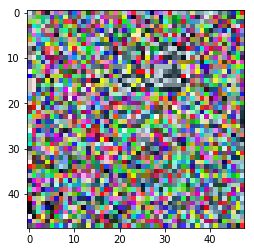

In [12]:
%matplotlib inline
sess = tf.Session()
sess.run(tf.global_variables_initializer())
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)
a  = sess.run(train_image)
import matplotlib.pyplot as plt
plt.imshow(a)
loss_history = list()
for _ in range(2000):
    _, l = sess.run([optimizer, loss])
    print(sum(sum(l)))
    loss_history.append(sum(sum(l)))

In [18]:
for _ in range(2000):
    _, l = sess.run([optimizer, loss])
    print(sum(sum(l)))
    loss_history.append(sum(sum(l)))

1297.25320053
1322.35621834
1323.41715908
1364.72092438
1376.48436546
1397.14584446
1321.98568153
1311.3250103
1306.72337914
1399.46262932
1371.77927876
1417.85683632
1341.01261139
1355.76088142
1455.53473854
1387.25965881
1346.23277855
1495.04947853
1478.56856537
1373.96332741
1521.68945312
1222.79383469
1350.88445473
1389.2328167
1366.70986557
1325.32754898
1336.38822365
1367.51538086
1365.00819969
1345.95661545
1383.97163391
1345.78925896
1547.91172409
1285.45692062
1318.77035522
1365.42461014
1291.00081444
1398.8300457
1376.76594734
1385.39813995
1484.15515518
1353.94706345
1401.17162132
1355.71068192
1381.70506287
1425.89858246
1371.89143944
1455.80056381
1369.3146286
1402.84737396
1377.34989357
1288.32993507
1502.0691061
1363.53874779
1521.08505249
1345.39810848
1410.09338379
1328.391119
1414.91216469
1352.42322254
1318.23846626
1270.80030441
1310.50061417
1364.38378143
1356.2166996
1473.11487961
1457.40860558
1449.58216095
1297.59007835
1444.9730854
1448.8113575
1346.12744904
13

1357.19189072
1383.39613914
1392.77457809
1367.94452095
1394.74594975
1379.0133791
1389.6837883
1411.83120155
1375.61856651
1331.18947029
1498.3421154
1378.52391434
1363.65110302
1382.00123024
1387.90553474
1391.94291687
1443.92117882
1365.58194542
1427.71059799
1407.09937859
1467.44914436
1405.30624771
1367.0340414
1441.61721325
1407.80991554
1396.80727005
1416.73471451
1352.89499664
1406.74654579
1386.53069115
1372.13488674
1429.1617527
1374.14562702
1551.21491241
1483.67781067
1369.2537241
1399.93838501
1341.98229885
1382.94591713
1432.48665905
1302.66736794
1412.26488113
1420.69847202
1430.97598076
1312.98962212
1420.30932617
1300.50880146
1360.3730793
1482.01548958
1436.67855167
1460.84603119
1449.1943264
1481.83613014
1264.7777462
1351.24808884
1355.20834637
1330.79479694
1449.92664337
1442.87892342
1367.36269665
1439.32250786
1358.8036375
1352.65065575
1392.78044128
1470.02807999
1530.42960548
1484.61334991
1466.6088562
1410.58526993
1422.24669647
1448.07420921
1317.59074402
138

1466.72244263
1421.79812813
1574.6851778
1343.3822155
1504.2628479
1384.55756187
1625.63975525
1357.71977139
1442.77319717
1423.41579628
1479.02720261
1477.19375229
1412.12008476
1479.57878876
1466.49914742
1531.2565937
1504.86464691
1496.70525742
1590.21387863
1535.07590866
1454.33624458
1509.55919075
1535.40742683
1442.60367584
1466.004673
1405.14506531
1539.14361763
1448.66924667
1385.17088699
1523.88121319
1521.75926971
1555.23265266
1402.83112335
1529.5555687
1425.657938
1586.14995956
1428.69834137
1424.47445107
1393.61869049
1405.23888206
1427.83393669
1403.88334084
1512.27587318
1360.20261383
1369.20083237
1416.65565109
1440.76101875
1390.87620544
1458.24095154
1432.47831917
1525.32100105
1495.11358261
1416.18481064
1398.57753563
1372.55486107
1405.05019188
1619.69079781
1436.79104614
1480.48363113
1333.2362175
1400.76808357
1363.73298264
1579.974123
1520.88019371
1363.84947777
1432.48240852
1451.60040474
1598.75831413
1563.78091812
1386.6520853
1370.2924614
1472.00920868
1540.5

KeyboardInterrupt: 

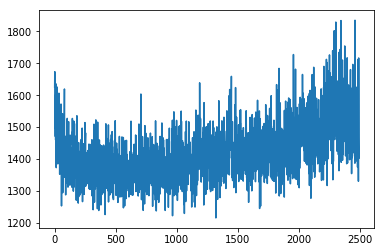

In [19]:
plt.plot(loss_history)

In [ ]:
from sklearn.metrics import roc_curve
a = sklearn.metrics.roc_curve([1], [0.24])#$ pos_label=None, sample_weight=None, drop_intermediate=True

print(a)
## RETURNS: 
# fpr : array, shape = [>2]
# Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
# tpr : array, shape = [>2]
# Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
# thresholds : array, shape = [n_thresholds]


[ 0.          0.00173611  1.        ]
[ 0.  0.  1.]
[ 1.43625331  0.43625337  0.        ]


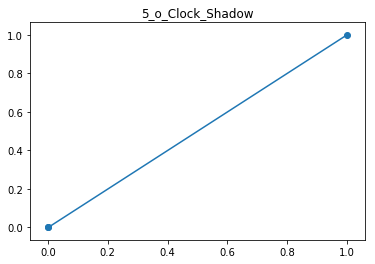

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


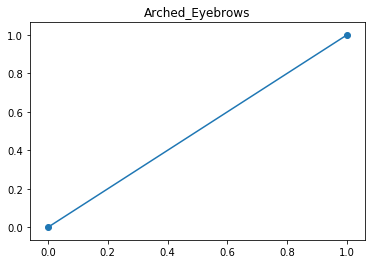

[ 0.          0.65963855  0.6686747   1.        ]
[ 0.          0.86363636  0.86363636  1.        ]
[  2.00000000e+00   1.00000000e+00   3.15178764e-12   0.00000000e+00]


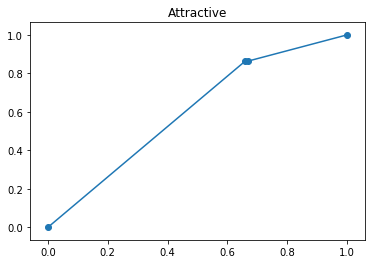

[ 0.          0.03441296  1.        ]
[ 0.          0.07534247  1.        ]
[ 2.  1.  0.]


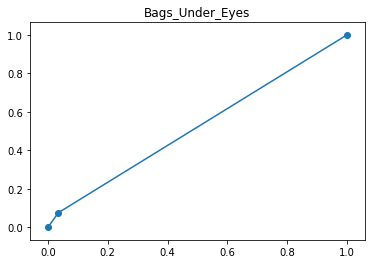

[ 0.          0.07407407  0.07568438  1.        ]
[ 0.          0.36842105  0.36842105  1.        ]
[  2.00000000e+00   1.00000000e+00   1.32125624e-31   0.00000000e+00]


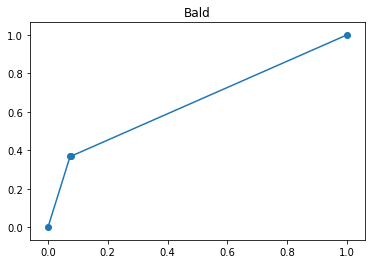

[ 0.  1.]
[ 0.01086957  1.        ]
[ 1.  0.]


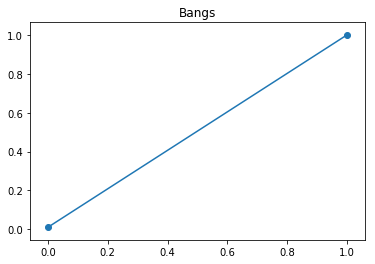

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


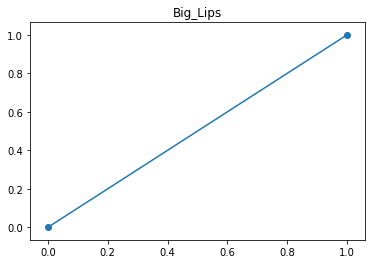

[ 0.          0.08067941  1.        ]
[ 0.          0.26035503  1.        ]
[ 2.  1.  0.]


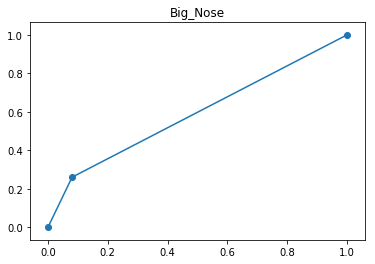

[ 0.          0.06693712  0.06896552  1.        ]
[ 0.         0.1292517  0.1292517  1.       ]
[  2.00000000e+00   1.00000000e+00   6.59672148e-32   0.00000000e+00]


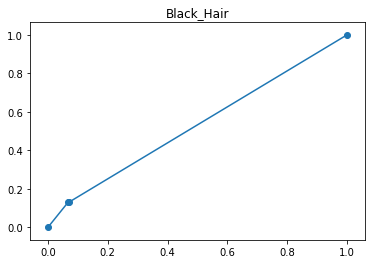

[ 0.          0.69133574  1.        ]
[ 0.          0.93023256  1.        ]
[ 2.  1.  0.]


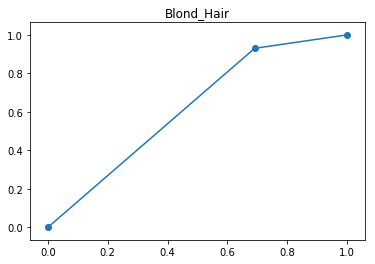

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


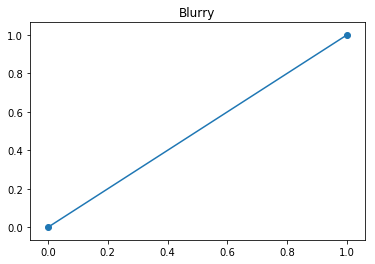

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


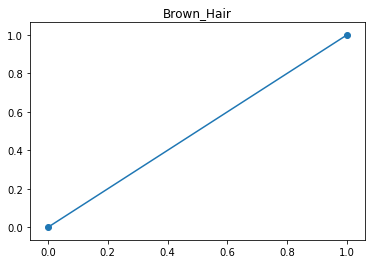

[ 0.          0.22181818  0.22363636  1.        ]
[ 0.          0.27777778  0.27777778  1.        ]
[  2.00000000e+00   1.00000000e+00   1.40230595e-18   0.00000000e+00]


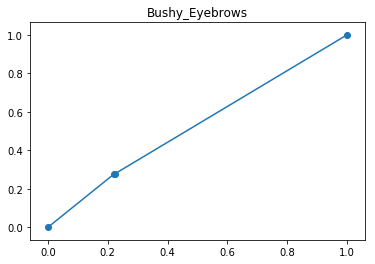

[ 0.          0.03934426  1.        ]
[ 0.          0.16666667  1.        ]
[ 2.  1.  0.]


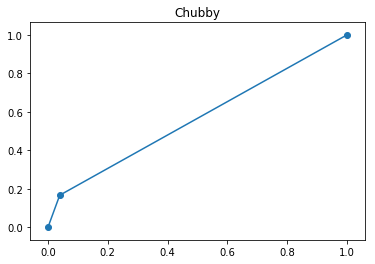

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


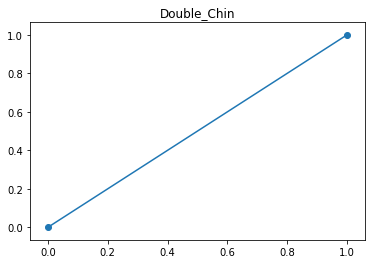

[ 0.          0.06489185  1.        ]
[ 0.          0.28205128  1.        ]
[ 2.  1.  0.]


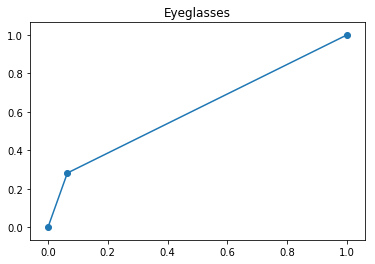

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


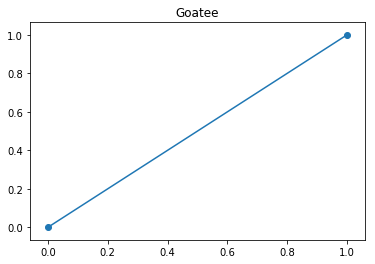

[ 0.          0.12913907  0.1307947   1.        ]
[ 0.          0.11111111  0.11111111  1.        ]
[  2.00000000e+00   1.00000000e+00   2.55409277e-10   0.00000000e+00]


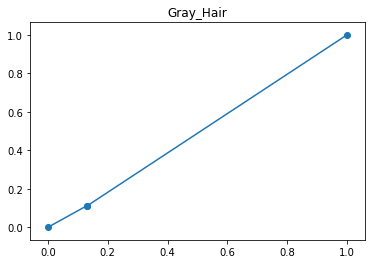

[ 0.          0.51960784  0.52205882  0.52205882  1.        ]
[ 0.          0.82327586  0.82327586  0.82758621  1.        ]
[  2.00000000e+00   1.00000000e+00   1.05068337e-18   6.26033423e-20
   0.00000000e+00]


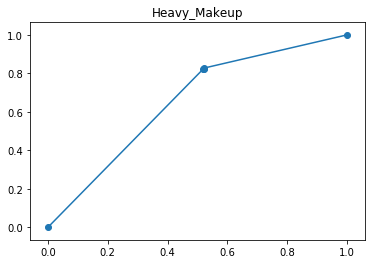

[ 0.          0.68108108  0.68378378  1.        ]
[ 0.          0.84074074  0.84074074  1.        ]
[  2.00000000e+00   1.00000000e+00   2.36015077e-17   0.00000000e+00]


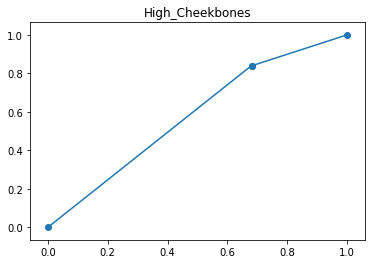

[ 0.          0.25587467  1.        ]
[ 0.          0.40077821  1.        ]
[ 2.  1.  0.]


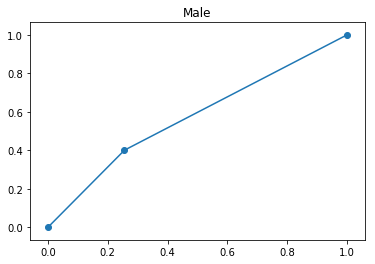

[ 0.          0.57784431  0.57784431  0.58083832  0.58083832  1.        ]
[ 0.          0.64379085  0.64705882  0.64705882  0.65686275  1.        ]
[  2.00000000e+00   1.00000000e+00   9.99997854e-01   7.70207644e-01
   5.15446467e-35   0.00000000e+00]


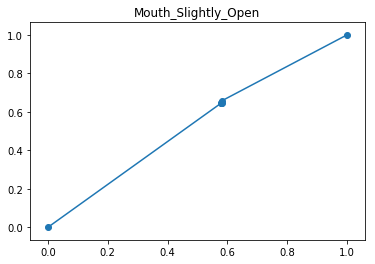

[ 0.          0.00487805  1.        ]
[ 0.    0.04  1.  ]
[ 2.  1.  0.]


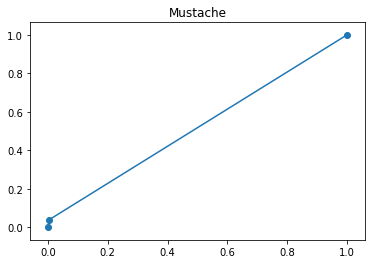

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


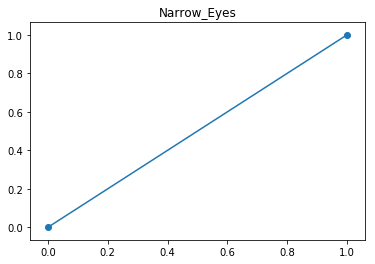

[ 0.  1.]
[ 0.  1.]
[ 2.  1.]


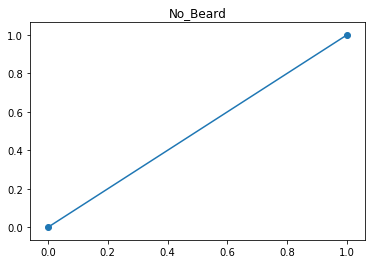

[ 0.          0.73969631  1.        ]
[ 0.          0.79329609  1.        ]
[ 2.  1.  0.]


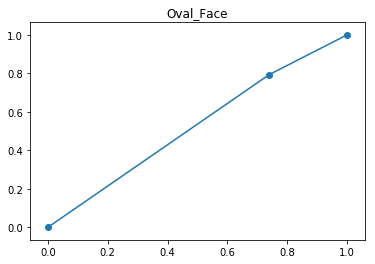

[ 0.  1.]
[ 0.  1.]
[ 1.  0.]


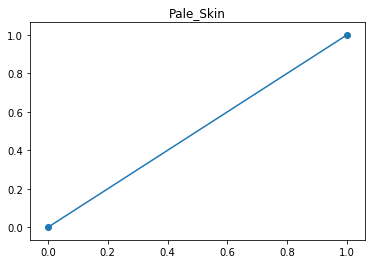

[ 0.          0.66444444  1.        ]
[ 0.          0.85263158  1.        ]
[ 2.  1.  0.]


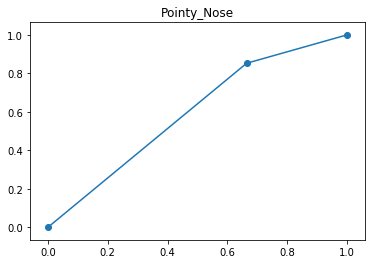

[ 0.          0.07986689  1.        ]
[ 0.  0.  1.]
[ 2.  1.  0.]


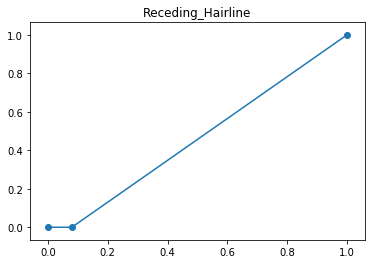

[ 0.          0.70598007  1.        ]
[ 0.          0.89473684  1.        ]
[ 2.  1.  0.]


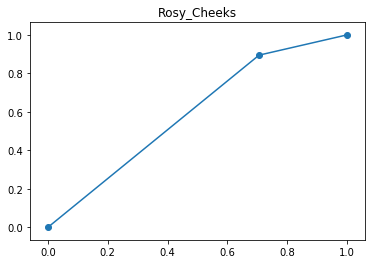

In [21]:
from sklearn.metrics import roc_curve
import sklearn

big_dataset_test_labels = list()
big_dataset_predicted = list()
for _ in range(20):
    test_images, test_labels = sess.run([test_image_batch, test_label_batch])
    predicted = sess.run(dense3, feed_dict={train_image_batch:test_images})
    big_dataset_test_labels.extend(test_labels)
    big_dataset_predicted.extend(predicted)

for indextouse in range(30):
    train_roc_labels = [x[indextouse] for x in big_dataset_test_labels]
    train_roc_predicted = [x[indextouse] for x in big_dataset_predicted]
    rocstuff = sklearn.metrics.roc_curve(train_roc_labels, train_roc_predicted)#$ pos_label=None, sample_weight=None, drop_intermediate=True
    print(rocstuff[0][:6])
    print(rocstuff[1][:6])
    print(rocstuff[2][:6])
    plt.scatter(rocstuff[0], rocstuff[1])
    plt.plot(rocstuff[0], rocstuff[1])
    plt.title(plaintext_labels[indextouse])
    plt.show()
#print(rocstuff[0])
#print(rocstuff[1])

In [ ]:
print(plaintext_labels)

In [ ]:
#test_images, test_labels = sess.run([test_image_batch, test_label_batch])
conv_results = sess.run(conv3, feed_dict={train_image_batch:test_images})
print(conv_results.shape)
conv_res = conv_results[0]
for layer in range(32):
    plt.imshow(conv_res[:,:,layer])
    plt.show()
#plt.imshow((test_images[0]*128)+128)
#print(test_images[0])

In [ ]:
# print(rocstuff[2])
# plt.plot(rocstuff[2])
# plt.show()


In [ ]:

a  = sess.run(train_image)
import matplotlib.pyplot as plt
plt.imshow(a)
print(a.shape)

# for _ in range(2000):
    _, l = sess.run([optimizer, loss])
    print(sum(sum(l)))

In [ ]:
train_image_batch_float = tf.cast

In [ ]:
sess = tf.Session()
  
# initialize the variables
sess.run(tf.global_variables_initializer())

# initialize the queue threads to start to shovel data
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)


In [ ]:
#sess.run(train_image_batch)
len(sess.run(train_label_batch)[0])



In [ ]:
print(train_image)
print(train_label)

In [ ]:
plaintext_labels

In [ ]:
import tensorflow as tf
tf.TextLineReader?

There are three other methods of getting data into a TensorFlow program:

Feeding: Python code provides the data when running each step.
Reading from files: an input pipeline reads the data from files at the beginning of a TensorFlow graph.
Preloaded data: a constant or variable in the TensorFlow graph holds all the data (for small data sets).


In [ ]:
#  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
import tensorflow as tf
tf.layers?
tf.layers.conv2d?

In [ ]:
tf.placeholder?

inputshape=[None,178,218]
input_layer = tf.placeholder(dtype=tf.float32, shape=inputshape, name='celebinput')

conv1 = tf.layers.conv2d(inputs=input_layer,filters=32,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same",activation=tf.nn.relu)
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
print(pool2)

## Section 3: Countering overfitting techniques: dropout and L2 regularization
With neural networks more data is always better. Large deep neural networks are almost always capable of learning input-output labels. This was recently demonstrated in this paper, in which they added random labels to images, the neural network was able to predict this nonsense label 100% of the time on the trainset. 

This "overfitting" is a big problem in neural networks. There are many ways to counter this, the two most famous ways are "L2 normalisation" and "dropout". 

### Dropout 
In neural networks every neuron tends to search for one specific pattern. This is all fine, except for that neurons tend to search for dataset specific patterns. To counter this we can randomly set the activations of neurons to zero during training. To score well on the trainset multiple neurons have to be able to detect the same patterns. This in turn ensures that your network generalises well and that you don't overfit. 

Units that are keps are scaled. This way the sum of the active neurons is unchanged. 

There is one parameter to dropout: what percentage of neurons to set to zero. A rate of 0.1 drops 10% of the input units. Hurray, another hyper-parameter you can control during learning!


### L2 regularization
When neural networks overfit some neurons have large weights to other neurons. If this pattern is not visible in the testset your network will still perform poorly. To counter this we can add an extra loss term: a penalty for having large weights! Although this is a great technique, it also required a lot of manual tuning. If you set the penalty too low your network does not care about the regularization. If you set the penalty too high your network won't be able to learn anything. 




In [ ]:
tf.layers.dropout?

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/nn/l2_loss

## Section 4: Tricks for faster training: batch normalisation
With picture humans are able to spot patterns that are difficult for neural networks to spot. An image can be grayscale, overlighted, very dark, or noisy: humans can still spot it. 

https://www.quora.com/Why-does-batch-normalization-help

It can help you learn faster, and also gives you a higher accuracy. 

There is a bit of a difference in the "backward pass" through the neural network. This writeup explains it in a very clear way. http://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html

https://www.tensorflow.org/api_docs/python/tf/nn/batch_normalization

Example in Tensorflow: http://ruishu.io/2016/12/27/batchnorm/


Remember when we applied dropout? We used a placeholder to set the percentage it had to drop. During inference (our testing and deployment) we don't want to have any dropout or batch normalization. 


## Section 5: Understand what your network learned: visualising layers and activations

A cool thing about neural networks is that you can see what your neuron reacts to. For normal neurons this can be difficult to see, especially in deeper layers. For convolutional layers however this can be a vital step to inspecting what your network actually learned. 

### Why is this important
Although we humans are good at knowing exactly what to look for when classifying an image, a neural network has to learn this from scratch. Some famous stories tell about the US building neural networks to classify tanks. As training data for the American tanks they took some pictures of the tanks outside of their base. For the Russian tanks they used spy cameras. Although the network performed great on the train and testset it did not work at all in the field... It turned out that the neural network learned the difference between a blurry image (taken with a spy camera) and a clear image (taken at the base itself). 

Another great example to consider is classifying if something is a wolf or a dog. Give it a try: 

![Search result dog](illustrations/dogsearch.png)
![Search result wolf](illustrations/wolfsearch.png)

What you might use to see the different are that wolfs have pointing up ears and thick fur. A neural network could go for totally different features: apparently dogs like to sit in green grass, and wolfs are often found in the snow. If you take the classefier you trained on this data to the local zoo it would likely not recognise the wolfs if there is no snow in the zoo. 


We are going to take a look at the activations of our layers, and will see if we can detect some nice features. 


In [ ]:
tf.nn.sigmoid_cross_entropy_with_logits

In [ ]:
tf.nn.sigmoid_cross_entropy_with_logits?